# Kickstarter Projects Analysis

### Motivation

1. What are the most successfull Kickstarter categories?

2. How does the size of Project's goal effect the success of a project?

3. What is the relationship between the size of a project and its amount of backers for both successful and failed projects?

4. Is it possible to build a model and predict chance of success for a project with this dataset?


##### The Data

Dataset consisting of over 350,000 Kickstarter Projects from April 2009 to February 2018. Collected from Kaggle Datasets: https://www.kaggle.com/datasets

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [215]:
df = pd.read_csv('ks-projects-201801.csv')

In [376]:
print ('DataFrame Shape', df.shape)
df.head()

DataFrame Shape (372289, 12)


,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days,bin
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58.490972,"1,000 to 10,000"
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59.802778,"10,000 to 100,000"
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44.985417,"10,000 to 100,000"
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29.857639,"1,000 to 10,000"
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,55.641667,"10,000 to 100,000"


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [218]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [219]:
df.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

### Understanding the Data & Preparation for Analysis

Performing some data cleaning, validation, and sanity checks before performing any analysis

In [220]:
df = df.drop(['ID', 'goal', 'pledged', 'currency', 'usd pledged'], axis=1)

Starting by dropping columns that aren't valuable to the analysis or redundant. USD_pledged_real and USD_goal_real will be used rather than Pledged or Currency, as these are in the local country's currency

#### Missing Data

In [221]:
### Checking for missing values
df.isnull().sum()

name                4
category            0
main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Only the 'name' column seems to have missing data. With only 4 samples here, I am going to drop these from the dataset.

In [222]:
##Removing missing data
df.dropna(inplace=True)

#### Dates

In [223]:
df.sort_values('launched').head(10)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,2010-06-01,1970-01-01 01:00:00,canceled,0,US,0.0,4000.00
48147,1st Super-Size Painting - Social Network Owned...,Art,Art,2010-08-14,1970-01-01 01:00:00,canceled,0,US,0.0,15000.00
273779,Identity Communications Infographic (Canceled),Design,Design,2010-04-10,1970-01-01 01:00:00,canceled,0,US,0.0,500.00
2842,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,2010-09-15,1970-01-01 01:00:00,canceled,0,US,0.0,5000.00
75397,"""ICHOR"" (Canceled)",Film & Video,Film & Video,2010-05-21,1970-01-01 01:00:00,canceled,0,US,0.0,700.00
319002,Student Auditions Music 2015,Publishing,Publishing,2015-10-31,1970-01-01 01:00:00,suspended,0,CH,0.0,1905.97
247913,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,2010-05-04,1970-01-01 01:00:00,canceled,0,US,0.0,10000.00
169268,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,2009-05-31,2009-04-21 21:02:48,failed,30,US,625.0,1000.00
322000,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,2009-07-20,2009-04-23 00:07:53,failed,3,US,22.0,80000.00
138572,drawing for dollars,Illustration,Art,2009-05-03,2009-04-24 21:52:03,successful,3,US,35.0,20.00


Some of the projects seem to have a UNIX epoch as a default for unknown values. With only 7, it shouldnt't be an issue if to drop these projects from the analysis as well.

In [224]:
#Convert date columns to datetime and make time delta column (Deadline - Launched) in hours
df.launched = pd.to_datetime(df.launched)
df.deadline = pd.to_datetime(df.deadline)

df['timedelta'] = (df.deadline-df.launched).astype('timedelta64[h]')

df.loc[df['timedelta'] == 0]

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta
156430,A Labradoodle Photobook,Photobooks,Photography,2016-11-11,2016-11-10 23:52:43,successful,8,US,18.0,5.0,0.0
180186,Successful E3 Conference for Dummies Short,Mixed Media,Art,2015-06-18,2015-06-17 23:08:53,failed,0,US,0.0,50.0,0.0


It looks like there were two projects that ended within the same hour of launching. May have to calculate time delta in hours (or days) as a decimal

In [225]:
df['timedelta'] = (df.deadline-df.launched).astype('timedelta64[m]')
df['timedelta_days'] = (df['timedelta']/60)/24
df = df.drop('timedelta', axis=1)

In [226]:
df.sort_values('timedelta_days', ascending=False).head(10)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
319002,Student Auditions Music 2015,Publishing,Publishing,2015-10-31,1970-01-01 01:00:00,suspended,0,CH,0.0,1905.97,16738.958333
2842,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,2010-09-15,1970-01-01 01:00:00,canceled,0,US,0.0,5000.00,14866.958333
48147,1st Super-Size Painting - Social Network Owned...,Art,Art,2010-08-14,1970-01-01 01:00:00,canceled,0,US,0.0,15000.00,14834.958333
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,2010-06-01,1970-01-01 01:00:00,canceled,0,US,0.0,4000.00,14760.958333
75397,"""ICHOR"" (Canceled)",Film & Video,Film & Video,2010-05-21,1970-01-01 01:00:00,canceled,0,US,0.0,700.00,14749.958333
247913,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,2010-05-04,1970-01-01 01:00:00,canceled,0,US,0.0,10000.00,14732.958333
273779,Identity Communications Infographic (Canceled),Design,Design,2010-04-10,1970-01-01 01:00:00,canceled,0,US,0.0,500.00,14708.958333
74196,SmoothnFusion Jazz Comedy Album,Jazz,Music,2011-04-01,2010-12-30 00:53:47,failed,3,US,146.0,12500.00,91.962500
200310,We Were Vampire,Film & Video,Film & Video,2011-04-04,2011-01-02 01:34:48,failed,0,US,0.0,250000.00,91.934028
305126,once upon a mountain,Documentary,Film & Video,2011-04-04,2011-01-02 02:35:59,failed,4,US,1530.0,20000.00,91.891667


In [227]:
###Dropping projectss with extreme timedelta's greater than 1 year
df = df.loc[df['timedelta_days'] < 366]

#### Outliers and Distributions

To get a good understanding of the questions that are being asked, it may be necessary to remove projects with very small and large project goal's

In [228]:
#### Projects with goals below $500 and more than $10,000,000
print ('Projects with less than $500 goal: ',len(df.loc[df.usd_goal_real < 500.0]))
print ('Projects with more than $10M goal: ',len(df.loc[df.usd_goal_real > 1000000.0]))

Projects with less than $500 goal:  21814
Projects with more than $10M goal:  1085


The distribution seems to be skewed heavily to the left, with a few extremely high project goals and many small project goals. May need to scale this data for further data visualization

In [229]:
figsize = (18,6)

def histogram_plot(dataset, column, x_label, title):
    plt.figure(figsize=figsize);
    plt.hist(data = dataset, x = column, bins = bins);
    plt.xscale('log');
    plt.xticks(ticks, labels);
    plt.xlabel(x_label);
    plt.grid(False)
    plt.title(title)

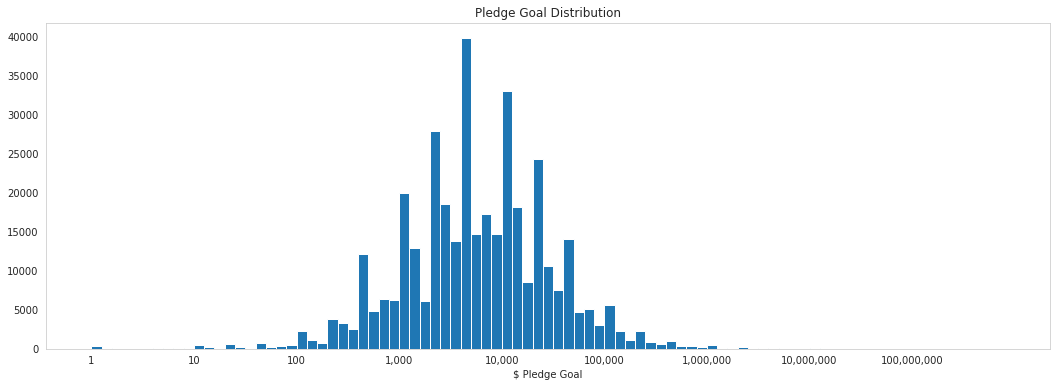

In [230]:
#USD PLEDGE GOAL DISTRIBUTION

#Selected histogram plot prameters using:(np.log10(df['usd_goal_real'].describe()))
bins = 10 ** np.arange(0, 9, .1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'usd_goal_real', '$ Pledge Goal', 'Pledge Goal Distribution')

Data scaled with Log10 to see a much cleaner and easily understood histogram of usd pledge goals. Any modeling for prediction will require these values to be scaled.

Projects with Pledge goals between 100 and 1,000,000 USD seem to be the appropriate sample for future modeling.

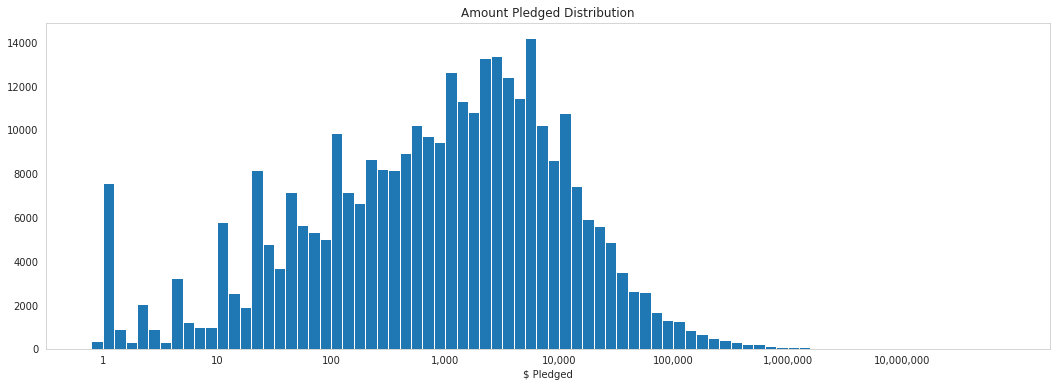

In [231]:
# USD PLEDGED DISTRIBUTION

#Selected histogram plot prameters using:(np.log10(df['usd_pledged_real'].describe()))
bins = 10 ** np.arange(-.1, 8, .1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'usd_pledged_real', '$ Pledged', 'Amount Pledged Distribution')

Pledge amounts seem to be slightly left skewed.

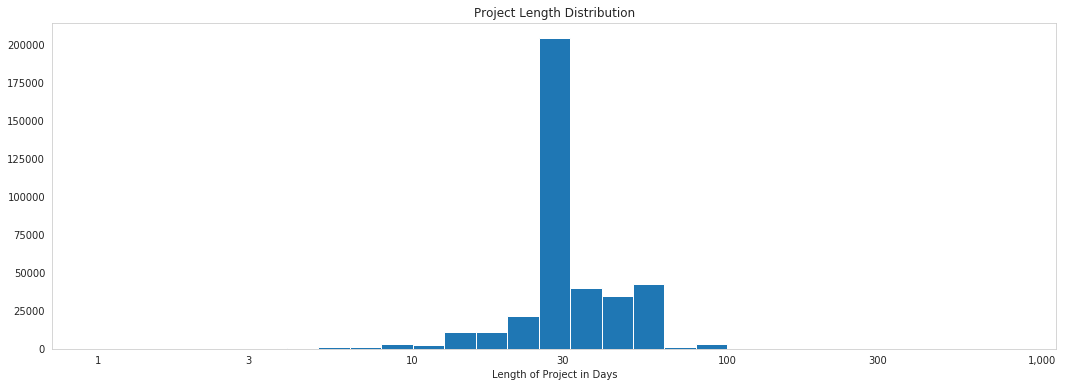

In [232]:
###Project Length Distribution

figsize = (18,6)

# Selected plot parameters using: np.log10(df['timedelta_days'].describe())
bins = 10 ** np.arange(0, 3, .1)
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'timedelta_days', 'Length of Project in Days', 'Project Length Distribution')

Majority of projects have a deadline within 30 days of launch

#### Further Investigation of Outliers

In [233]:
##High Pledge Goal Projects (2.5M USD)
df.loc[df['usd_goal_real'] > 2500000].sort_values('usd_goal_real', ascending=False).head(10)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
47803,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,2014-08-08,2014-07-09 00:24:34,failed,0,GB,0.00,1.663614e+08,29.982639
196531,A Celtic Lovestory,Drama,Film & Video,2015-11-30,2015-11-17 00:47:15,failed,0,GB,0.00,1.513959e+08,12.966667
367928,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,2015-10-24,2015-08-25 23:52:30,failed,2,FR,2.20,1.101698e+08,59.004861
222208,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Movie Theaters,Film & Video,2017-03-14,2017-01-13 20:08:41,failed,2,DE,38.65,1.073699e+08,59.160417
226161,Kitchen from Austria in Switzerland,Restaurants,Food,2015-10-05,2015-08-06 19:12:10,failed,0,CH,0.00,1.040572e+08,59.199306
257518,Peace,Film & Video,Film & Video,2017-09-13,2017-08-14 16:46:05,failed,1,US,1.00,1.000000e+08,29.300694
259186,UniqueTrends,Apparel,Fashion,2015-03-04,2015-02-02 23:52:25,failed,1,US,1.00,1.000000e+08,29.004861
371478,"""PG"" Reanimated Cartoons Tha Movie",Animation,Film & Video,2015-04-11,2015-02-10 23:49:30,failed,0,US,0.00,1.000000e+08,59.006944
214787,Is Anyone Out There ?,Technology,Technology,2015-08-01,2015-06-02 19:21:34,failed,0,US,0.00,1.000000e+08,59.193056
72775,Art Is Fabulous,Art,Art,2016-06-05,2016-04-06 02:55:07,failed,2,US,115.00,1.000000e+08,59.877778


Once again, may need to remove these rows when training a model to possibly predict chance of success. The pledge goals are unrealistic and will hurt the gernalization of our model

In [234]:
##USD Pledge goal
df.loc[df['usd_pledged_real'] > 10000000].sort_values('usd_pledged_real',
                                                      ascending=False)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
157270,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,2015-03-28,2015-02-24 15:44:42,successful,78471,US,20338986.27,500000.0,31.343750
250254,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,2014-08-30,2014-07-08 10:14:37,successful,62642,US,13285226.36,50000.0,52.572917
216629,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,2016-06-30,2016-05-24 15:49:52,successful,66673,US,12779843.49,1000000.0,36.340278
289915,Kingdom Death: Monster 1.5,Tabletop Games,Games,2017-01-08,2016-11-25 06:01:41,successful,19264,US,12393139.69,100000.0,43.748611
282416,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,2012-05-19,2012-04-11 06:59:04,successful,68929,US,10266845.74,100000.0,37.708333


#### Data Preparation Conclusion

Now that the data has been cleaned and validated, Some analysis can be performed to answer our questions. I will keep some of the questionable 'outlier' projects for now, but will most likely remove them when training a model in order to help genrealize better.


#### Analysis - Finding Answers

What are the most popular and/or successfull Kickstarter categories?

In [235]:
print ('Unique Categories: ',df.category.nunique())
print ('Unique Main Categories: ', df.main_category.nunique())

pd.DataFrame(data={
            'Count':df.main_category.value_counts(),
            '% of Total Projects': (df.main_category.value_counts()/(len(df))*100),
            '% of Success': (df.main_category.loc[df['state'] == 'successful']
                             .value_counts()/(len(df))*100)
            }).sort_values('Count', ascending=False)

Unique Categories:  159
Unique Main Categories:  15


,Count,% of Total Projects,% of Success
Film & Video,63582,16.791760,6.238743
Music,51917,13.711079,6.390334
Publishing,39873,10.530305,3.248382
Games,35230,9.304107,3.305955
Technology,32569,8.601347,1.699195
Design,30068,7.940842,2.786214
Art,28151,7.434570,3.039746
Food,24602,6.497293,1.607025
Fashion,22816,6.025617,1.477090
Theater,10912,2.881817,1.725604


It seems there is a correlation between how popular a category is, and its rate of success

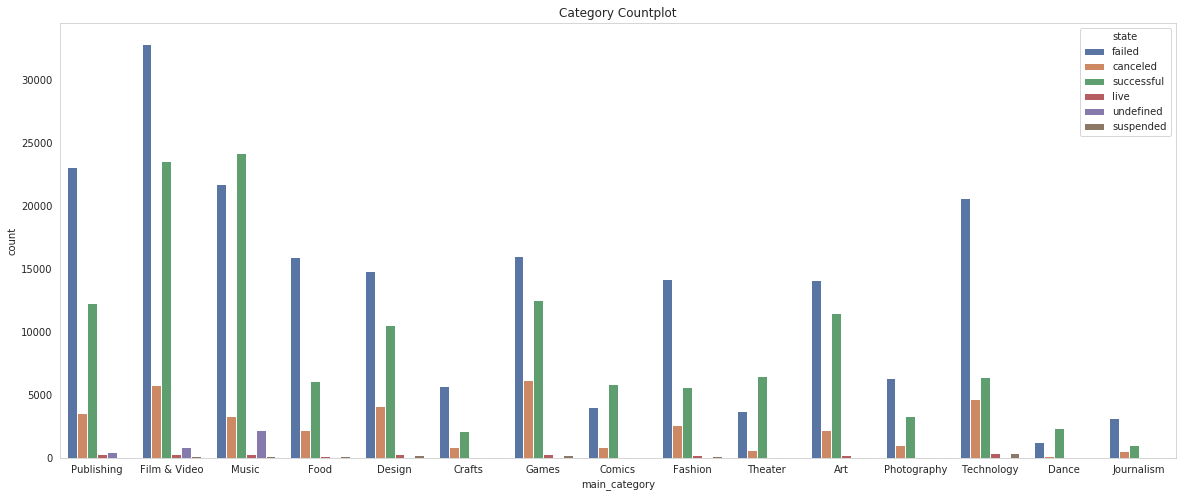

In [236]:
## State countplot by category
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,8
ax = sns.countplot(x="main_category", hue="state", palette='deep',data=df)
ax.set_title("Category Countplot");

The most popular categories in this dataset are are Film & Radio and Music. There is also an undefined state for project status.

What are the success rates of projects of different pledge goal sizes?

In [237]:
##Dropping projects with undefined and live states
df = df.loc[df.state != 'undefined']
df = df.loc[df.state != 'live']

In [238]:
#Creating Bin columns for project size
df['bin'] = pd.cut(df['usd_goal_real'],
                   [1, 1000, 10000, 100000, 1000000, 1000000000],
                   labels=['Less than 1000',
                           '1,000 to 10,000',
                           '10,000 to 100,000', 
                           '100,000 to 1,000,000',
                           'Greater than 1,000,000'],
                   duplicates='drop')

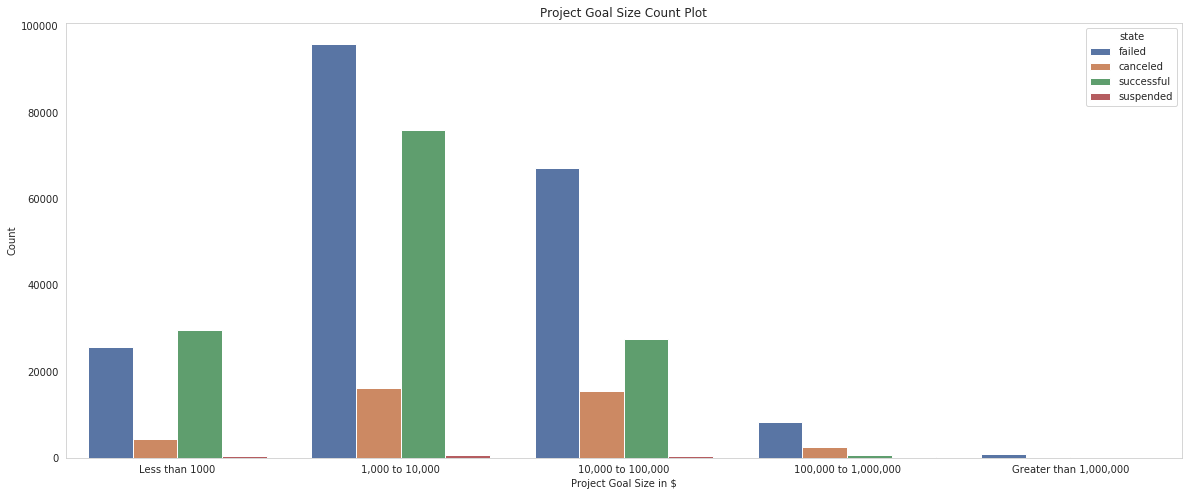

In [239]:
ax = sns.countplot(x="bin", hue="state", data=df, palette='deep');
ax.set(xlabel='Project Goal Size in $', ylabel='Count');
ax.set_title("Project Goal Size Count Plot");

At first glance, it looks like the smaller projects seem to be more successful, as expected.

What is the average pledged by each backer for successful and failed projects?

/Users/paulrussell/Downloads/clear/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


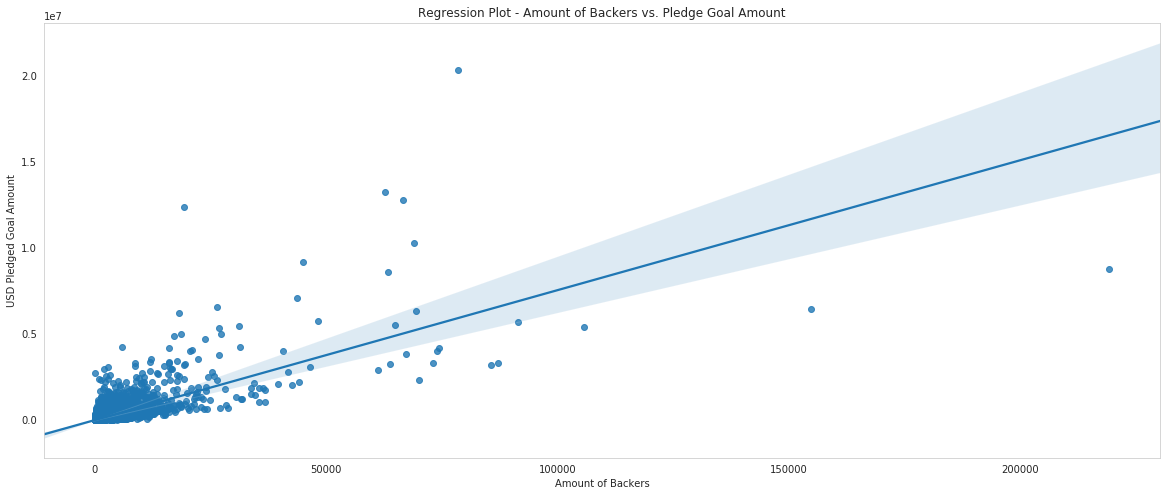

In [240]:
##All Projects
ax = sns.regplot(x='backers',y='usd_pledged_real', data=df)
ax.set(xlabel='Amount of Backers', ylabel='USD Pledged Goal Amount');
ax.set_title("Regression Plot - Amount of Backers vs. Pledge Goal Amount");

In [241]:
###Now just with successful projects
success = df.loc[df['state'] == 'successful']

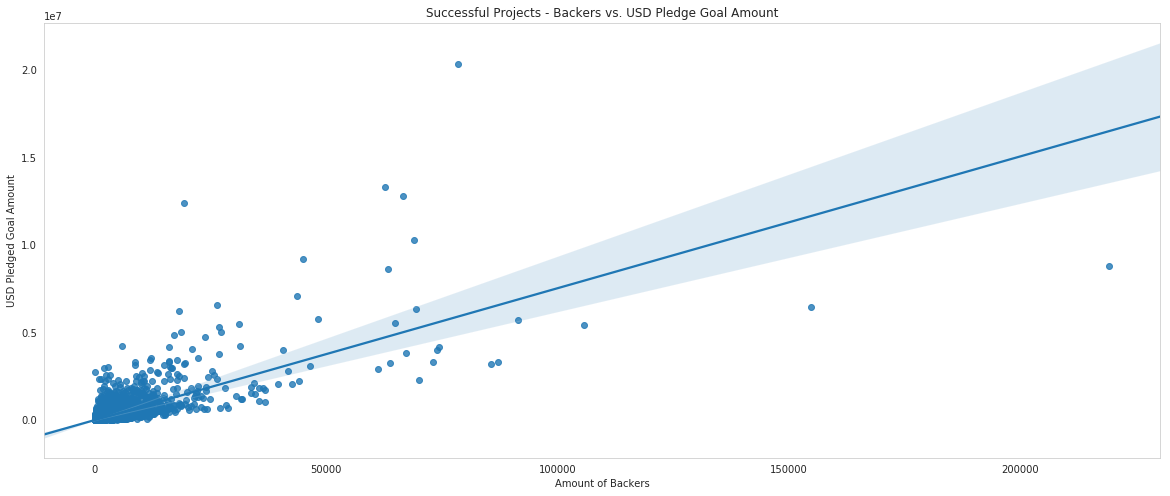

In [242]:
ax = sns.regplot(x='backers',y='usd_pledged_real', data=success)
ax.set(xlabel='Amount of Backers', ylabel='USD Pledged Goal Amount');
ax.set_title("Successful Projects - Backers vs. USD Pledge Goal Amount");

In [243]:
###Failed
failed = df.loc[df['state'] == 'failed']

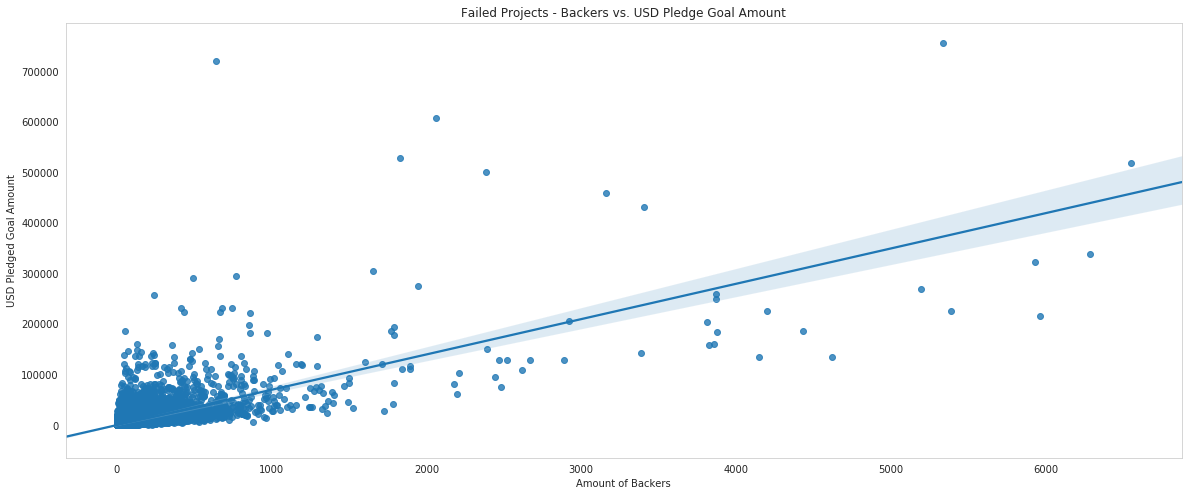

In [244]:
ax = sns.regplot(x='backers',y='usd_pledged_real', data=failed)
ax.set(xlabel='Amount of Backers', ylabel='USD Pledged Goal Amount');
ax.set_title("Failed Projects - Backers vs. USD Pledge Goal Amount");

Can we predict the success of a project?

In [363]:
model_df = df.copy()

In [364]:
##Dropping some columns before training model

#Unfortunately cannot usd backers as a feature here. Since we do not know the backers of a project at the creation
#of one.
model_df = model_df.drop(['name', 'deadline', 'launched', 'backers', 'bin'], axis=1)

Last minute data cleaning for training

In [365]:
##Dropping state of undefined projects, since this is going to be our target variable
model_df = model_df.loc[df['state'] != 'undefined']

Dealing with categorical variables

In [366]:
## Getting Dummies for state column
cat_columns = ['category', 'main_category', 'country']
cat_df = pd.get_dummies(model_df[cat_columns], prefix=cat_columns)

model_df = pd.concat([model_df, cat_df], axis=1)
model_df.drop(cat_columns, axis=1, inplace=True)

#Formatting target variable to 1(successful) and 0(not successful)
model_df.state.replace(['successful', 'failed', 'canceled', 'suspended'], [1, 0, 0, 0], inplace=True)

Preprocessing Data

In [367]:
#Converting target variable to numerical values
feats = model_df.iloc[:,1:]
target = model_df.iloc[:, 0]

In [368]:
##Splitting the data
# X_train, X_test, y_train, y_test = train_test_split(
# ...     X, y, test_size=0.33, random_state=42)

def splitting_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = splitting_data(feats, target)

In [372]:
#Scaling Data

def scale_data(train, test):
    scaler = StandardScaler();
    scaled_X_test = scaler.fit_transform(train);
    scaled_X_train = scaler.fit_transform(test);
    
    return scaled_X_test, scaled_X_train

X_train, X_test = scale_data(X_train, X_test);


Simple Logistic Regression Model

In [370]:
clf = LogisticRegression(solver='lbfgs', max_iter=500).fit(X_train, y_train)

Scoring and Prediction

In [371]:
clf.score(X_test, y_test)

0.8854187015693169

In [362]:
###Percent of successful projects
success_pct =  (y_test.sum()/len(y_test))

#Benchmark to beat (assuming the model selected failure for all projects)
print (1-success_pct)

0.6393664127108158


In comparison, it looks like this model is quite successful at predict the project state

88% percent model accuracy vs. the 'dummy prediction' of 64%

In [357]:
#output probability
clf.predict_proba(X_test)

array([[0.99354548, 0.00645452],
       [0.98755738, 0.01244262],
       [0.75998471, 0.24001529],
       ...,
       [0.77710279, 0.22289721],
       [0.00441383, 0.99558617],
       [0.57406494, 0.42593506]])

In [378]:
!jupyter nbconvert --to html data-analysis.ipynb

[NbConvertApp] Converting notebook data-analysis.ipynb to html
[NbConvertApp] Writing 644942 bytes to data-analysis.html


In [379]:
!jupyter nbconvert --to script data-analysis.ipynb

[NbConvertApp] Converting notebook data-analysis.ipynb to script
[NbConvertApp] Writing 11666 bytes to data-analysis.py
